# Module 6: WeatherPy

### Importing needed modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time

import requests as req
from config import weather_api_key
from citipy import citipy

from scipy.stats import linregress

### Creating a set of random latitude and longitude combinations, and then creating a list of the two variables

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)

### Creating a list to hold cities, identifying the nearest city for each latitude and longtitude combination, # If the city is unique, then we will add it to the cities list.

In [3]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)

### API Retrieval

Creating an emply list to hold the weather data and creating record / set counters. Looping through the list of cities and building the city URL. Following, an API request is generated for each city and turned into a JSON formed. It then parses through the needed data and appends the data into a city_data dict. If an errior is experioenced when calling the data, the try-except block will skip the city.

In [4]:
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        city_weather = req.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | grand centre
City not found. Skipping...
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | pacific grove
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | punta alta
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | tabou
Processing Record 13 of Set 1 | cockburn town
Processing Record 14 of Set 1 | jiroft
City not found. Skipping...
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 20 of Set 1 | saskyla

Processing Record 37 of Set 4 | mecca
Processing Record 38 of Set 4 | pinar del rio
Processing Record 39 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 4 | chokurdakh
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | campoverde
Processing Record 45 of Set 4 | sorland
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | mehran
Processing Record 48 of Set 4 | marcona
City not found. Skipping...
Processing Record 49 of Set 4 | tehachapi
Processing Record 50 of Set 4 | cape canaveral
Processing Record 1 of Set 5 | fatehpur
Processing Record 2 of Set 5 | lutin
Processing Record 3 of Set 5 | bam
Processing Record 4 of Set 5 | varsag
Processing Record 5 of Set 5 | mar del plata
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | bela
Processing Record 8 of Set 5 | banda aceh
Processing Record 9 of Set 5 | ushirombo
Processi

Processing Record 24 of Set 8 | khandbari
Processing Record 25 of Set 8 | iquitos
Processing Record 26 of Set 8 | ajdabiya
Processing Record 27 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 28 of Set 8 | sargatskoye
Processing Record 29 of Set 8 | flin flon
Processing Record 30 of Set 8 | gari
Processing Record 31 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 32 of Set 8 | verkhoyansk
Processing Record 33 of Set 8 | gimbi
Processing Record 34 of Set 8 | waingapu
Processing Record 35 of Set 8 | agadez
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | half moon bay
Processing Record 38 of Set 8 | zeerust
Processing Record 39 of Set 8 | ballina
Processing Record 40 of Set 8 | barkhera
Processing Record 41 of Set 8 | laguna
Processing Record 42 of Set 8 | hualmay
Processing Record 43 of Set 8 | bunia
Processing Record 44 of Set 8 | bahia de caraquez
Processing Record 45 of Set 8 | sambhal
Processing Record 46 of Set 8 | narya

Processing Record 13 of Set 12 | muros
Processing Record 14 of Set 12 | puerto colombia
Processing Record 15 of Set 12 | longlac
City not found. Skipping...
Processing Record 16 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 17 of Set 12 | derzhavinsk
Processing Record 18 of Set 12 | iracoubo
Processing Record 19 of Set 12 | banjar
Processing Record 20 of Set 12 | karasjok
Processing Record 21 of Set 12 | la asuncion
Processing Record 22 of Set 12 | bonthe
Processing Record 23 of Set 12 | karratha
Processing Record 24 of Set 12 | homer
Processing Record 25 of Set 12 | praia da vitoria
Processing Record 26 of Set 12 | maniitsoq
Processing Record 27 of Set 12 | venice
Processing Record 28 of Set 12 | mandalgovi
Processing Record 29 of Set 12 | helong
Processing Record 30 of Set 12 | hambantota
Processing Record 31 of Set 12 | suileng
Processing Record 32 of Set 12 | lephepe
City not found. Skipping...
Processing Record 33 of Set 12 | dhemaji
Processing Record 34 of Se

### Creating a dataframe for retrieved data, and outputing into a CSV

In [5]:
city_data_df = pd.DataFrame(city_data)
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2020-06-25 23:03:33,59.70,30.79,66.20,72,0,4.47
1,Pacific Grove,US,2020-06-25 23:02:00,36.62,-121.92,69.01,68,40,14.99
2,Punta Arenas,CL,2020-06-25 23:03:33,-53.15,-70.92,30.20,92,11,5.82
3,Sitka,US,2020-06-25 23:03:33,57.05,-135.33,53.60,66,90,11.41
4,Pevek,RU,2020-06-25 23:03:34,69.70,170.31,33.53,94,52,15.14
5,Jamestown,US,2020-06-25 23:03:31,42.10,-79.24,69.80,60,75,6.17
6,Punta Alta,AR,2020-06-25 23:03:34,-38.88,-62.07,45.95,57,0,10.87
7,Hobart,AU,2020-06-25 23:02:02,-42.88,147.33,45.00,65,20,8.05
8,Provideniya,RU,2020-06-25 23:03:34,64.38,-173.30,48.20,66,75,15.66
9,Tabou,CI,2020-06-25 23:03:34,4.42,-7.35,76.03,85,95,9.40


In [6]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Extracting data for plotting

In [7]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
today = time.time()
today = time.strftime("%x")

### Plotting the City Latitude vs Max Temp

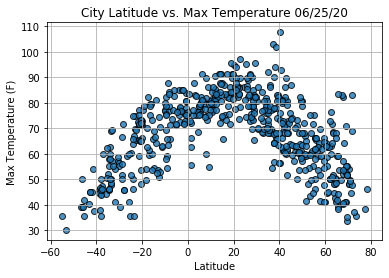

In [8]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")

plt.show()

### Ploting City Latitude vs Humidity

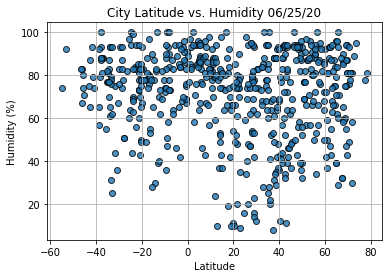

In [9]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")

plt.show()

### Plotting City Latitude vs cloudiness

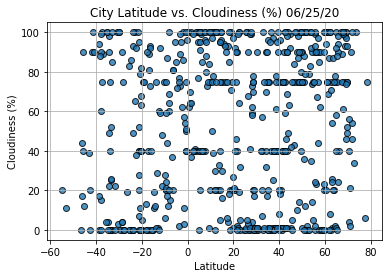

In [10]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")

plt.show()

### Plotting City Latitude vs Wind Speed

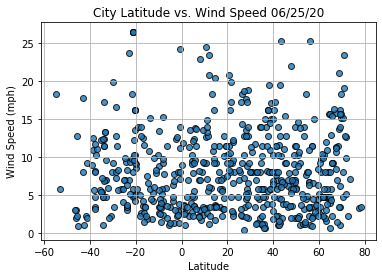

In [11]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")

plt.show()

### Creating a Linear Regression Function that would be plotted onto a scatter plot

In [20]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

### Creating Northern and Southern Hemisphere Data Frames, and plotting them using the lingear regresssion function previously created

### Plotting Latitude against Max Temperature for Northern and Southern Hemisphere

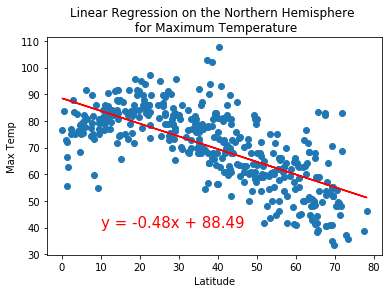

In [26]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp', (10, 40))

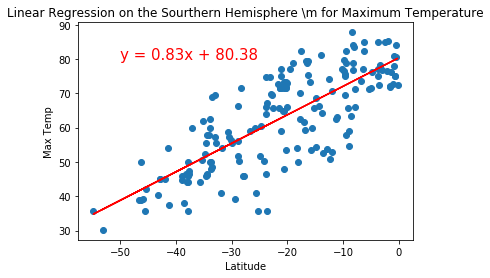

In [27]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Sourthern Hemisphere \m for Maximum Temperature", "Max Temp", (-50, 80))

### Plotting Latitude against Humidity for the Northern and Southern Hemisphere

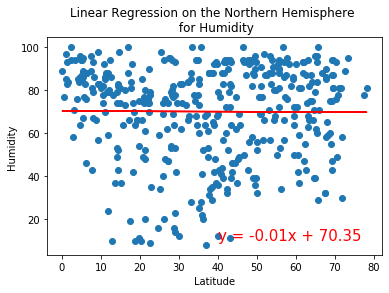

In [31]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity", (40, 10))

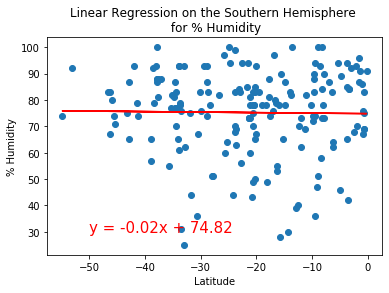

In [40]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-50, 30))

### Finding the Correlation Between Latitude and Percent Cloudiness

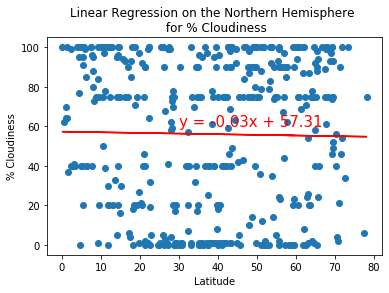

In [46]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(30,60))

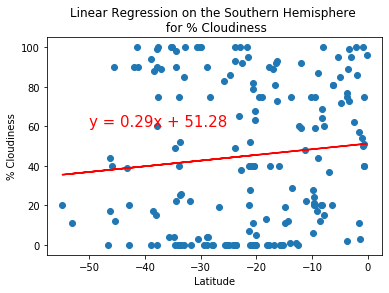

In [43]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

### Finding the Correlation Between Latitude and Wind Speed for Northern and Southern Hemisphere

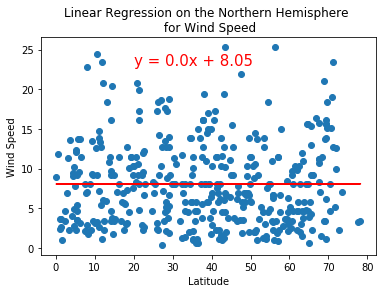

In [53]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,23))

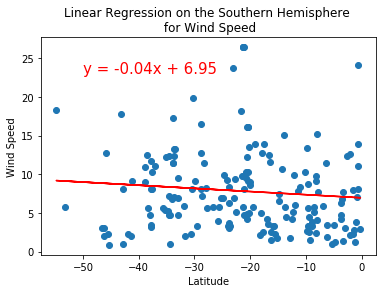

In [57]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,23))